K-MEANS ALGORITM IMPLEMENTATION


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline


In [52]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [53]:
X

array([[-3.69297336,  6.98651621],
       [ 6.58500925, -1.74456039],
       [ 2.72501261,  5.77196939],
       ...,
       [ 5.3351252 , -2.32789459],
       [ 3.63471221,  7.01353663],
       [ 5.34285322,  0.97193671]])

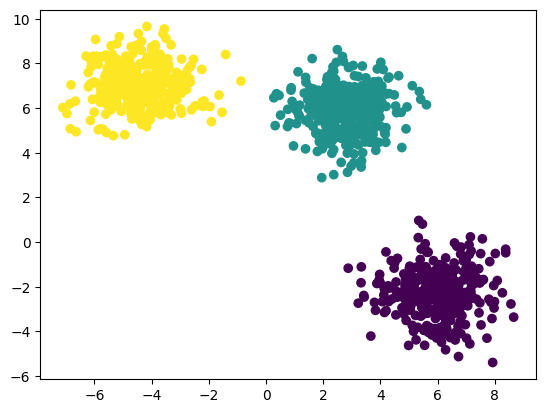

In [54]:
plt.scatter(X[:,0],X[:,1],c=y)

In [55]:
#standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [58]:
from sklearn.cluster import KMeans

In [59]:
# use elbow method to find optimal k
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [60]:
wcss

[1599.9999999999995,
 442.88529637597105,
 83.00246095552188,
 74.50472015318505,
 68.51710347024803,
 59.31303078389688,
 55.961708385772305,
 45.673332415514295,
 36.20580072241474,
 33.432134940138724]

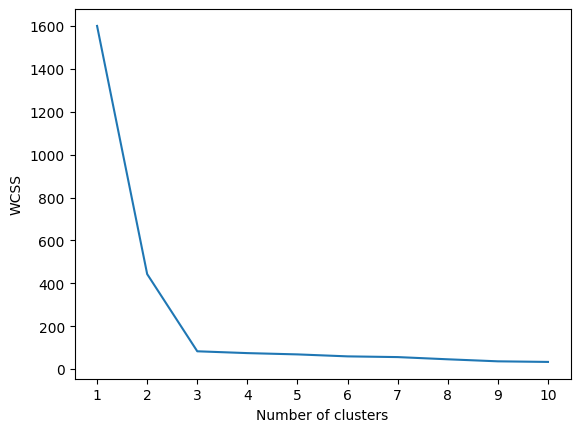

In [61]:
#plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
kmeans.predict(X_train_scaled)

array([3, 8, 2, 4, 8, 5, 5, 4, 3, 6, 2, 6, 9, 8, 7, 5, 8, 5, 4, 7, 7, 8,
       7, 4, 3, 4, 6, 3, 4, 5, 6, 8, 4, 5, 6, 6, 3, 9, 6, 3, 1, 9, 5, 2,
       9, 2, 6, 5, 6, 0, 4, 0, 6, 5, 5, 5, 2, 4, 6, 6, 5, 2, 5, 7, 8, 4,
       0, 8, 8, 7, 1, 0, 7, 5, 5, 2, 0, 8, 9, 3, 8, 5, 1, 0, 2, 2, 7, 8,
       8, 6, 5, 2, 2, 0, 5, 3, 6, 2, 5, 4, 5, 9, 6, 1, 2, 0, 5, 5, 7, 5,
       5, 6, 0, 5, 6, 2, 7, 5, 6, 9, 6, 3, 5, 3, 0, 5, 5, 0, 4, 6, 4, 4,
       4, 2, 0, 8, 2, 3, 8, 8, 1, 5, 0, 8, 0, 3, 3, 5, 6, 9, 5, 0, 9, 0,
       3, 2, 4, 7, 3, 8, 1, 0, 6, 7, 8, 0, 4, 4, 2, 7, 0, 4, 8, 5, 7, 4,
       2, 0, 7, 9, 0, 2, 3, 4, 4, 1, 8, 1, 4, 2, 9, 0, 5, 2, 2, 7, 7, 4,
       2, 8, 6, 6, 6, 1, 9, 4, 4, 6, 7, 0, 0, 3, 5, 5, 7, 5, 5, 8, 2, 0,
       8, 0, 8, 4, 1, 9, 7, 7, 5, 3, 9, 4, 9, 5, 1, 4, 0, 9, 9, 3, 4, 1,
       6, 8, 2, 0, 5, 4, 1, 3, 2, 3, 7, 7, 4, 2, 4, 6, 3, 1, 8, 5, 0, 3,
       1, 7, 8, 6, 4, 1, 2, 0, 3, 5, 2, 6, 8, 2, 9, 1, 2, 5, 4, 1, 0, 9,
       9, 9, 8, 3, 3, 9, 9, 5, 9, 8, 3, 9, 0, 4, 8,

In [63]:
y_pred = kmeans.predict(X_test_scaled)
y_pred

array([0, 2, 3, 4, 1, 6, 7, 6, 8, 2, 7, 4, 6, 6, 8, 5, 1, 3, 8, 2, 1, 2,
       2, 7, 6, 3, 1, 3, 9, 4, 6, 9, 5, 8, 6, 8, 4, 4, 4, 8, 6, 3, 2, 6,
       6, 9, 4, 1, 2, 0, 5, 5, 4, 4, 4, 2, 8, 0, 0, 3, 2, 0, 6, 0, 5, 5,
       5, 7, 8, 6, 6, 8, 0, 3, 0, 6, 5, 4, 9, 9, 6, 4, 3, 0, 5, 3, 2, 4,
       2, 2, 9, 2, 3, 3, 3, 4, 9, 8, 1, 8, 2, 9, 6, 6, 6, 5, 7, 4, 2, 2,
       6, 4, 0, 2, 7, 3, 4, 7, 4, 4, 1, 1, 0, 5, 1, 1, 4, 4, 2, 3, 0, 0,
       4, 4, 9, 4, 0, 5, 1, 2, 1, 6, 2, 0, 8, 2, 8, 9, 2, 5, 3, 4, 9, 9,
       7, 5, 7, 5, 8, 3, 5, 4, 5, 7, 5, 3, 2, 8, 0, 5, 7, 2, 9, 6, 5, 4,
       4, 6, 9, 6, 1, 1, 3, 6, 7, 2, 9, 0, 7, 9, 7, 9, 8, 3, 6, 5, 7, 9,
       2, 5])

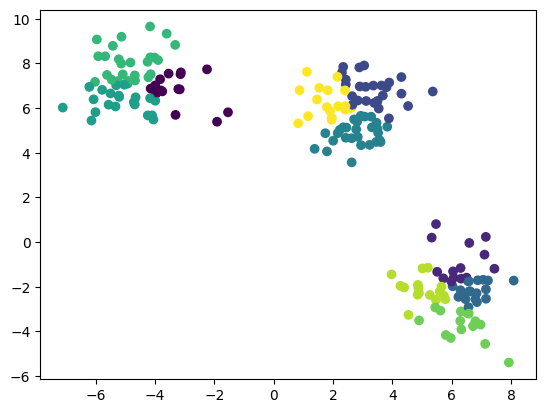

In [64]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
